In [7]:
# https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/
# https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/
# https://www.pyimagesearch.com/2018/11/19/mask-r-cnn-with-opencv/
# https://towardsdatascience.com/webcam-object-detection-with-mask-r-cnn-on-google-colab-b3b012053ed1

#%tensorflow_version 1.x


#change add the Mask_RCNN directory to files. 
# example: replace 'mrcnn' with:
# Mask_RCNN.mrcnn

# install mask_rcnn library or it's better to upload it, with the custom files.
#!git clone https://github.com/matterport/Mask_RCNN.git

# !unzip '/content/drive/My Drive/machinelearningdataset/Mask_RCNN.zip'


#install some libraries from tpu
#!git clone https://github.com/tensorflow/tpu/

# import libraries required for the mask_rcnn library
!pip3 install -r 'Mask_RCNN/requirements.txt'
!cd Mask_RCNN ; python3 setup.py install

# download the Microsoft-coco dataset, in the mask_rcnn folder 
# !cd Mask_RCNN; wget 'https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5'

!cd

print('')
print('')
print ('###################################all done###################################')

Using cached scipy-1.2.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (27.3 MB)
  Using cached tensorflow-1.15.2-cp37-cp37m-macosx_10_11_x86_64.whl (123.3 MB)
  Using cached Keras-2.2.5-py2.py3-none-any.whl (336 kB)
  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorflow
    Found existing insta

In [0]:

#shared deepfashion2 dataset.
#!unzip -P 2019Deepfashion2** '/content/drive/My Drive/DeepFashion2 Dataset/json_for_validation.zip'

#  deepfashion2 dataset saved on google drive
# !unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/json_for_validation.zip'
# print('\n','##########################done upzipping files.###########################################')
# !unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/test.zip'
# print('\n','##########################done upzipping test files.###########################################')
# !unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/train.zip'
# print('\n','##########################done upzipping train files.###########################################')
# !unzip -P 2019Deepfashion2** '/content/drive/My Drive/machinelearningdataset/validation.zip'
# print('\n','##########################done upzipping validation files.###########################################')


In [2]:
# making sure that everything got installed properly
# %tensorflow_version 1.x

!pip3 show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/site-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [7]:
# # rename the train as train_ to make a smaller train folder 
# # make a new smaller folder with a 100 from the directory 

# %cd /content/
# !mkdir train
# %cd /content/train/
# !mkdir image


# %cd /content/train_/image

# !ls | head -n 10000 | xargs -i mv {} /content/train/image/


In [6]:

# # make a new smaller folder with a 100 from the directory 


# %cd /content/train/
# !mkdir annos


# %cd /content/train_/annos/
# !ls | head -n 10000 | xargs -i mv {} /content/train/annos/

In [5]:
# %cd /content/

# # !mkdir annos_coco

In [0]:
# convert the annonations to coco-compatible
# deepfashion2_to_coco.py is not accurate. or maybe it is accurate, but files need to be sorted first

# change the number of images inside the deepfashion2_to_coco.py file in the DeepFashion2>evalation. 
# from 16000 to 100 (number of images is the smaller train folder)

# %cd /content/
# !ls


# # try:
# !python /content/DeepFashion2/evaluation/deepfashion2_to_coco.py

# print('###############################')
# !ls

In [0]:
# import json
# open_file='/content/deepfashion2.json'

# # open_file='/content/train/annos/000011.json'

# name_of_class=["short_sleeved_shirt",
#                   "long_sleeved_shirt",
#                   "short_sleeved_outwear",
#                   "long_sleeved_outwear",
#                   "vest",
#                   "sling",
#                   "shorts",
#                   "trousers",
#                   "skirt",
#                   "short_sleeved_dress",
#                   "long_sleeved_dress",
#                   "vest_dress",
#                   "sling_dress"]
# image_id=[]
# with open(open_file) as f:
#     data = f.read()
#     jsondata = json.loads(data)

# k=jsondata['annotations'][0]['bbox']
# width=jsondata['images'][0]['width']
# image_id_iterate=jsondata['images'][0]['id']
# image_id.append(image_id_iterate)
# category_iterate=jsondata['annotations'][0]['category_id']
# name_of_item_iterate=name_of_class[category_iterate-1]
        
# print(image_id)
# print(category_iterate)
# print(name_of_item_iterate)

# print(len(jsondata['annotations'][0]))
# print(jsondata['annotations'][0])


# %matplotlib inline
# import matplotlib.pyplot as plt

# im=plt.imread('/content/train/image/000001.jpg')
# plt.imshow(im)

# print (k)
# print(jsondata)

624 468
[[257, 35, 261, 89, 228, 123, 137, 103, 45, 91, 1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 141, 364, 219, 485, 274, 603, 401, 590, 467, 502, 442, 336, 369, 195, 348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 257, 35], [1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 1, 176], [348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 348, 138]]
(624, 468)
[257, 35, 261, 89, 228, 123, 137, 103, 45, 91, 1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 141, 364, 219, 485, 274, 603, 401, 590, 467, 502, 442, 336, 369, 195, 348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 257, 35, 1, 176, 0, 332, 47, 447, 151, 401, 141, 366, 129, 328, 1, 176, 348, 138, 363, 163, 372, 197, 433, 137, 396, 92, 341, 35, 348, 138]


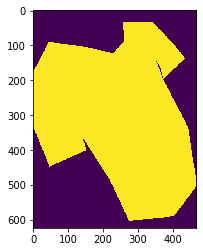

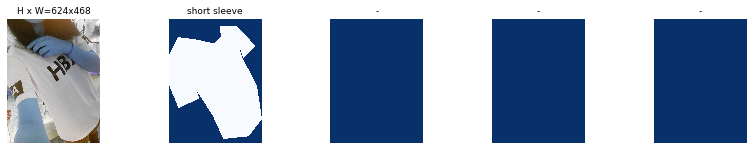

In [10]:
######
#####
#segmentation load_mask() function
######
#####

%matplotlib inline

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw 
import skimage.color as color
import json
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn import visualize
from Mask_RCNN.mrcnn.visualize import display_images


open_file= '/Users/ibrahim/Downloads/fashion_mask_rcnn/train/annos/000001.json'
with open(open_file) as f:
  data = f.read()
  jsondata = json.loads(data)
# print(jsondata['item2']['segmentation'][0])



segmentation_iterate=jsondata['item1']['segmentation']
try:
  segmentation_iterate_2=jsondata['item2']['segmentation']
except Exception:
  print('nope')
  pass


polygon_points=[]

image = Image.open('/Users/ibrahim/Downloads/fashion_mask_rcnn/train/image/000001.jpg')
h, w = image.size
print(w,h)

print(segmentation_iterate)

img = Image.new('L', (h, w), 0)
for k in range(len(segmentation_iterate)):
  ImageDraw.Draw(img).polygon(segmentation_iterate[k], fill=400)
  for index, values in enumerate(segmentation_iterate[k]):
    polygon_points.append(values)
mask = np.array(img)





print(mask.shape)
print(polygon_points)
plt.imshow(mask)


plt.show()

import cv2
image = cv2.imread('/Users/ibrahim/Downloads/fashion_mask_rcnn/train/image/000001.jpg')
image=np.array(image)
mask=np.expand_dims(mask,axis=2)
class_ids = [0]
class_names=['short sleeve']
visualize.display_top_masks(image, mask, class_ids, class_names)

    



In [15]:
###########################
###########################

####using segnmentations###

###########################
###########################


# %tensorflow_version 1.x


from os import listdir
import json
import PIL.Image as Image
from PIL import Image
import numpy as np
from numpy import zeros
from numpy import asarray
from Mask_RCNN.mrcnn.utils import Dataset
from Mask_RCNN.mrcnn.config import Config
from Mask_RCNN.mrcnn.model import MaskRCNN
from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn.utils import extract_bboxes

import matplotlib

import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.color as color
import PIL.ImageDraw as ImageDraw


# from the deepfahion2 dataset. 
# 1 represents short sleeve top, 
# 2 represents long sleeve top, 
# 3 represents short sleeve outwear, 
# 4 represents long sleeve outwear, 
# 5 represents vest, 
# 6 represents sling, 
# 7 represents shorts, 
# 8 represents trousers, 
# 9 represents skirt, 
# 10 represents short sleeve dress, 
# 11 represents long sleeve dress, 
# 12 represents vest dress,  
# 13 represents sling dress

# class that defines and loads the kangaroo dataset
class Short_sleeve_shirt_Dataset(Dataset):
  def load_dataset(self, dataset_dir, is_train=True):
    self.add_class("fashion", 1, "short sleeve top")
    self.add_class("fashion", 2, "long sleeve top")
    self.add_class("fashion", 3, "short sleeve outwear")
    self.add_class("fashion", 4, "long sleeve outwear")
    self.add_class("fashion", 5, "vest")
    self.add_class("fashion", 6, "sling")
    self.add_class("fashion", 7, "shorts")
    self.add_class("fashion", 8, "trousers")
    self.add_class("fashion", 9, "skirt")
    self.add_class("fashion", 10, "short sleeve dress")
    self.add_class("fashion", 11, "long sleeve dress")
    self.add_class("fashion", 12, "vest dress")
    self.add_class("fashion", 13, "sling dress")

    
    dataset_dir= '/Users/ibrahim/Downloads/fashion_mask_rcnn/train'
    images_dir = dataset_dir + '/image/'
    annotations_dir = dataset_dir + '/annos/'

    ordered = listdir(images_dir)
    ordered.sort()

    image_id=[]
    width=[]
    height=[]
    bounding_box=[]
    category_id=[]
    category_name=[]
    segmentation=[]
    #print(len(ordered))
    for filename in ordered:
          image_id_text=filename[:-4]
          image_id.append(int(filename[:-4]))
          img = Image.open(images_dir+filename)
          w, h = img.size
          width.append(w)
          height.append(h)

          open_file= annotations_dir+ (image_id_text)+ '.json'
          with open(open_file) as f:
            data = f.read()
            jsondata = json.loads(data)

          bounding_box_iterate=jsondata['item1']['bounding_box']
          category_id_iterate=jsondata['item1']['category_id']
          category_name_iterate=jsondata['item1']['category_name']
          segmentation_iterate=jsondata['item1']['segmentation']
          bounding_box.append(bounding_box_iterate)
          category_id.append(category_id_iterate)
          category_name.append(category_name_iterate)
          segmentation.append(segmentation_iterate)
          
          # if category_name_iterate== 'short sleeve top':

          if is_train and int(image_id_text) >= 8000:
            #print('in')
            continue
          if not is_train and int(image_id_text) < 8000:
            #print('out')
            continue
          img_path = images_dir + filename
          ann_path = open_file #annotations_dir + image_id_text + '.json'
          # add to dataset
          
          self.add_image('fashion', image_id=image_id, path=img_path, annotation=ann_path)
          
         

  def load_mask(self, image_id_in_function):

    dataset_dir= '/Users/ibrahim/Downloads/fashion_mask_rcnn/train'
    images_dir = dataset_dir + '/image/'
    annotations_dir = dataset_dir + '/annos/'

    ordered = listdir(images_dir)
    ordered.sort()

    image_id_sss=[]
    image_id=[]
    width=[]
    height=[]
    bounding_box=[]
    category_id=[]
    category_name=[]
    segmentation=[]
    #print(len(ordered))
    for filename in ordered:
          image_id_text=filename[:-4]
          image_id.append(int(filename[:-4]))
          img = Image.open(images_dir+filename)
          w, h = img.size
  
          open_file= annotations_dir+ (image_id_text)+ '.json'
          with open(open_file) as f:
            data = f.read()
            jsondata = json.loads(data)

          category_name_iterate=jsondata['item1']['category_name']
          
          
          # if category_name_iterate== 'short sleeve top':
          #   which_dataset_is_it=0
          bounding_box_iterate=jsondata['item1']['bounding_box']
          category_id_iterate=jsondata['item1']['category_id']
          
          segmentation_iterate=jsondata['item1']['segmentation']
          bounding_box.append(bounding_box_iterate)
          category_id.append(category_id_iterate)
          category_name.append(category_name_iterate)
          segmentation.append(segmentation_iterate)
          image_id_sss.append(int(image_id_text))
          width.append(w)
          height.append(h)

    
    bounding_box=np.array(bounding_box)
    category_id=np.array(category_id)
    category_name=np.array(category_name)
    segmentation=np.array(segmentation)
    width=np.array(width)
    height=np.array(height)

    height_at_image_id_in_function= height[image_id_in_function]
    width_at_image_id_in_function= width[image_id_in_function]
    bounding_box_at_image_id_in_function= bounding_box[image_id_in_function]
    segmentation_at_image_id_in_function=segmentation[image_id_in_function]
    category_name_at_image_id_in_function=category_name[image_id_in_function]


    polygon_points=[]

    # print(segmentation_at_image_id_in_function)

    img = Image.new('L', (width_at_image_id_in_function, height_at_image_id_in_function), 0)
    for k in range(len(segmentation_at_image_id_in_function)):
      ImageDraw.Draw(img).polygon(segmentation_at_image_id_in_function[k], fill=400)
      for index, values in enumerate(segmentation_at_image_id_in_function[k]):
        polygon_points.append(values)
    masks = np.array(img)
    masks=np.expand_dims(masks,axis=2)
    class_ids = []
    # if which_dataset_is_it==0:
    class_ids.append(self.class_names.index(category_name_at_image_id_in_function))
      
    # if which_dataset_is_it==1:
    #   class_ids.append(self.class_names.index('long sleeve top'))
    return masks, asarray(class_ids, dtype='int32')

In [16]:


# define a configuration for the model
class Short_sleeve_shirt_Config(Config):
    # define the name of the configuration
    NAME = "short_sleeve_shirt_cfg"
    # BACKBONE = "resnet50"
    
    # TRAIN_ROIS_PER_IMAGE = 200 # default is unchanged

    # number of classes (background + the other 13 calsses for fashion)
    NUM_CLASSES = 1 + 13
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5


In [17]:
def get_imagenet_weights(self):
    """Downloads ImageNet trained weights from Keras.
    Returns path to weights file.
    """
    from keras.utils.data_utils import get_file
    TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/'\
                              'releases/download/v0.2/'\
                              'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
    weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                            TF_WEIGHTS_PATH_NO_TOP,
                            cache_subdir='models',
                            md5_hash='a268eb855778b3df3c7506639542a6af')
    return weights_path

In [18]:
# prepare train set
train_set = Short_sleeve_shirt_Dataset()
train_set.load_dataset('fashion', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# prepare test/val set
test_set = Short_sleeve_shirt_Dataset()
test_set.load_dataset('fashion', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# prepare config
config = Short_sleeve_shirt_Config()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
# load weights (mscoco) and exclude the output layers

init_with = "coco"
if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
    
elif init_with == "coco":
    
    # Load the last model you trained and continue training
    
    ######## model.load_weights(model.find_last(), by_name=True)
    model.load_weights('/Users/ibrahim/Downloads/fashion_mask_rcnn/Mask_RCNN/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

# train weights (output layers or 'heads')
model_training_results = model.train(train_set, test_set, learning_rate=config.LEARNING_RATE / 100, epochs=1, layers='all')


model.keras_model.summary()

Train: 7999


KeyboardInterrupt: 

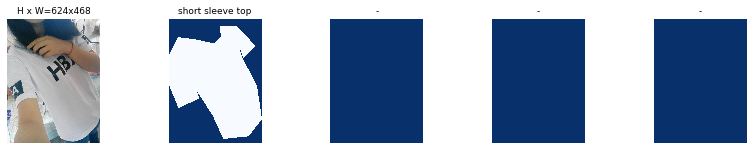

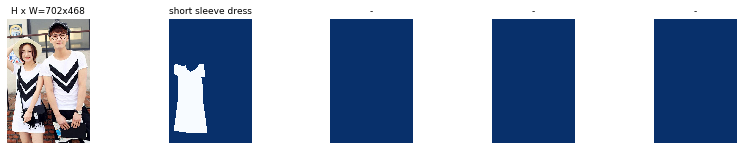

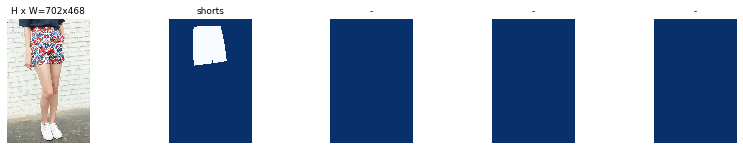

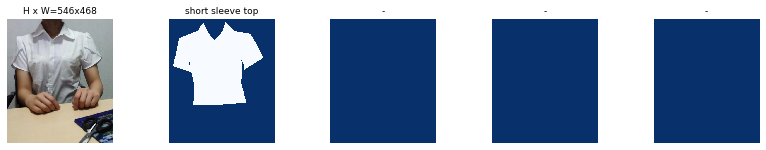

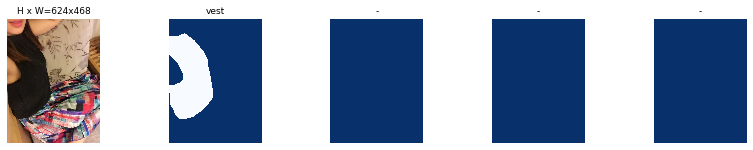

In [19]:
from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn import visualize
from Mask_RCNN.mrcnn.visualize import display_images


# # train set
train_set = Short_sleeve_shirt_Dataset()
train_set.load_dataset('fashion', is_train=True)
train_set.prepare()
# # define image id


# # for image_id in range(0,39):
#   #print(image_id)
image_id = 0
#   # try:
# # load the image
image = train_set.load_image(image_id)
# # load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# # extract bounding boxes from the masks
# bbox = extract_bboxes(mask)
# # # display image with masks and bounding boxes
# display_instances(image, bbox, mask, class_ids, train_set.class_names)
#   # except Exception:
#   #   continue

visualize.display_top_masks(image, mask, class_ids, train_set.class_names)
mask.shape


# Load and display 4 random samples
image_ids = np.random.choice(train_set.image_ids, 4)
for image_id in image_ids:
    image = train_set.load_image(image_id)
    mask, class_ids = train_set.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, train_set.class_names)


image_id  3263 


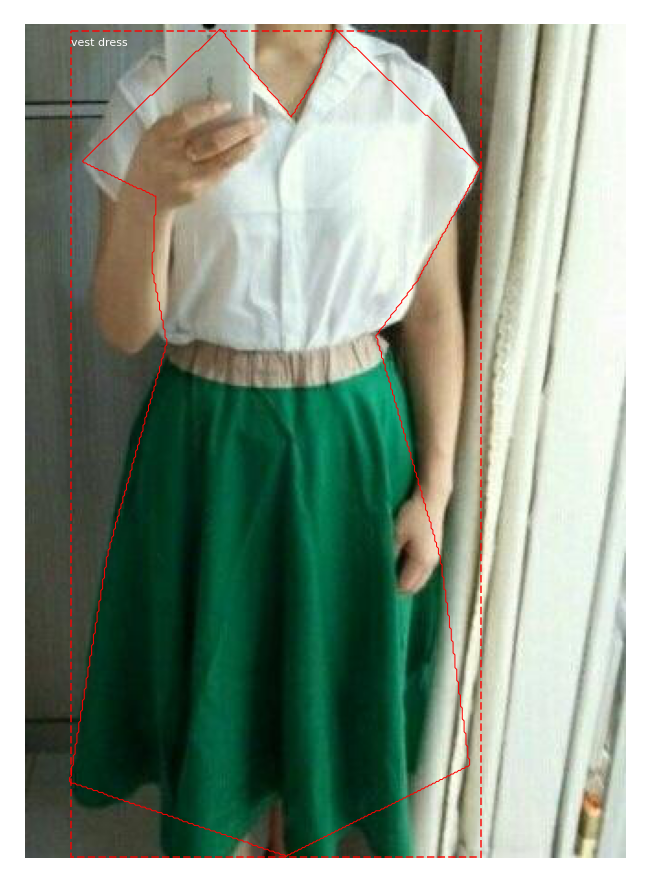

image_id:  49 
Original shape:  (833, 468, 3)


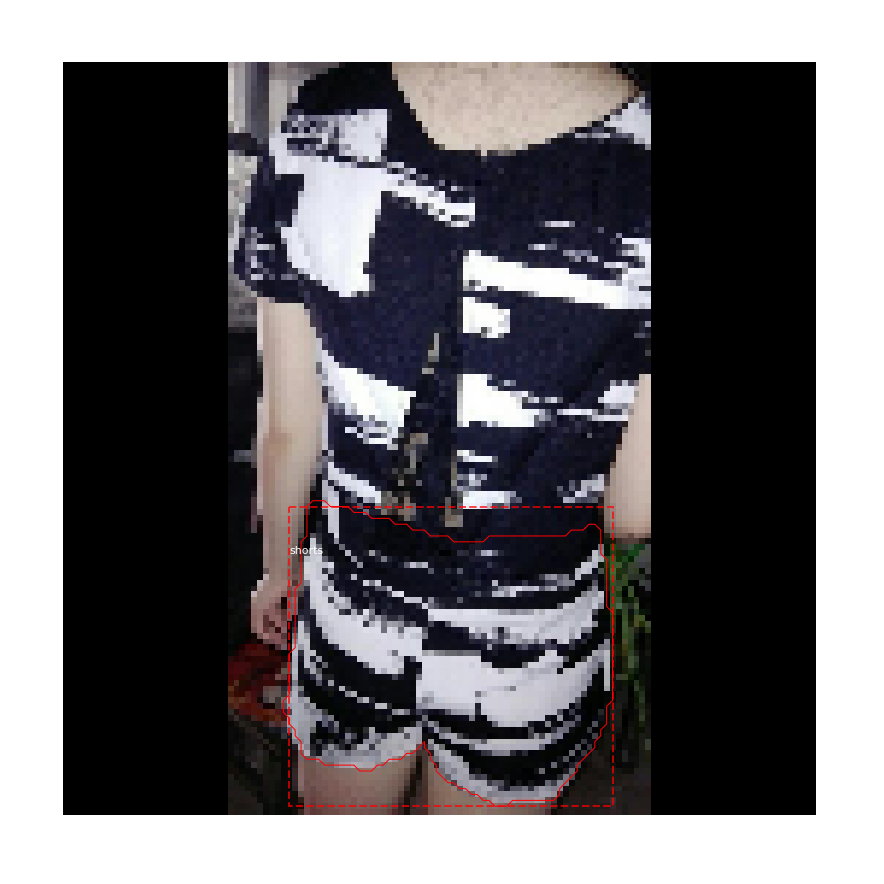

In [0]:
################
###############

##### visualize some training results####

################
###############

from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from Mask_RCNN.mrcnn.config import Config
from Mask_RCNN.mrcnn.model import MaskRCNN
from Mask_RCNN.mrcnn.model import mold_image
from Mask_RCNN.mrcnn.utils import Dataset
from Mask_RCNN.mrcnn import utils
import random


# Load random image and mask.
image_id = random.choice(train_set.image_ids)

image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, train_set.image_reference(image_id))
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)




# Load random image and mask.
image_id = np.random.choice(train_set.image_ids, 1)[0]
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, train_set.image_reference(image_id))
print("Original shape: ", original_shape)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)


In [6]:
!python3 /Users/ibrahim/Downloads/fashion_mask_rcnn/infer.py


############
###########
### inference

# define a configuration for the model
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "short_sleeve_shirt_cfg"
    BACKBONE = "resnet50"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 13  # background + 1 class

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5

    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
    DETECTION_MIN_CONFIDENCE = 0.6

    # Non-maximum suppression threshold for detection
    DETECTION_NMS_THRESHOLD = 0.0


# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode="inference", model_dir="./", config=cfg)
# load model weights. Where it was trained in the earlier step.
# the latest mask has the least error, so load that one
model_path = "/Users/ibrahim/Downloads/fashion_mask_rcnn/mask_rcnn_fashion.h5"

# in case of an error, use below
# model.load_weights(model_path, by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
model.load_weights(
    model_path,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"],
)

model.keras_model.summary()


___________________________________________________________
res5a_branch2a (Conv2D)         (None, None, None, 5 524800      res4f_out[0][0]                  
__________________________________________________________________________________________________
bn5a_branch2a (BatchNorm)       (None, None, None, 5 2048        res5a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_28 (Activation)      (None, None, None, 5 0           bn5a_branch2a[0][0]              
__________________________________________________________________________________________________
res5a_branch2b (Conv2D)         (None, None, None, 5 2359808     activation_28[0][0]              
__________________________________________________________________________________________________
bn5a_branch2b (BatchNorm)       (None, None, None, 5 2048        res5a_branch2b[0][0]             
_________________________________________________

--2020-04-26 13:22:19--  https://cdn.shopify.com/s/files/1/2321/0267/products/felix-longsleeve.jpg
Resolving cdn.shopify.com (cdn.shopify.com)...151.101.52.104, 2a04:4e42:d::104
Connecting to cdn.shopify.com (cdn.shopify.com)|151.101.52.104|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 378328 (369K) [image/jpeg]
Saving to: ‘felix-longsleeve.jpg’

felix-longsleeve.jp 100%[===================>] 369.46K  --.-KB/s    in 0.09s   

2020-04-26 13:22:19 (4.12 MB/s) - ‘felix-longsleeve.jpg’ saved [378328/378328]

--2020-04-26 13:22:20--  https://cdn.shopify.com/s/files/1/0210/9734/products/ahzekLR.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 151.101.52.104, 2a04:4e42:d::104
Connecting to cdn.shopify.com (cdn.shopify.com)|151.101.52.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91940 (90K) [image/jpeg]
Saving to: ‘ahzekLR.jpg’

ahzekLR.jpg         100%[===================>]  89.79K  --.-KB/s    in 0.04s   

2020-04-26 13:22:20 (2.4

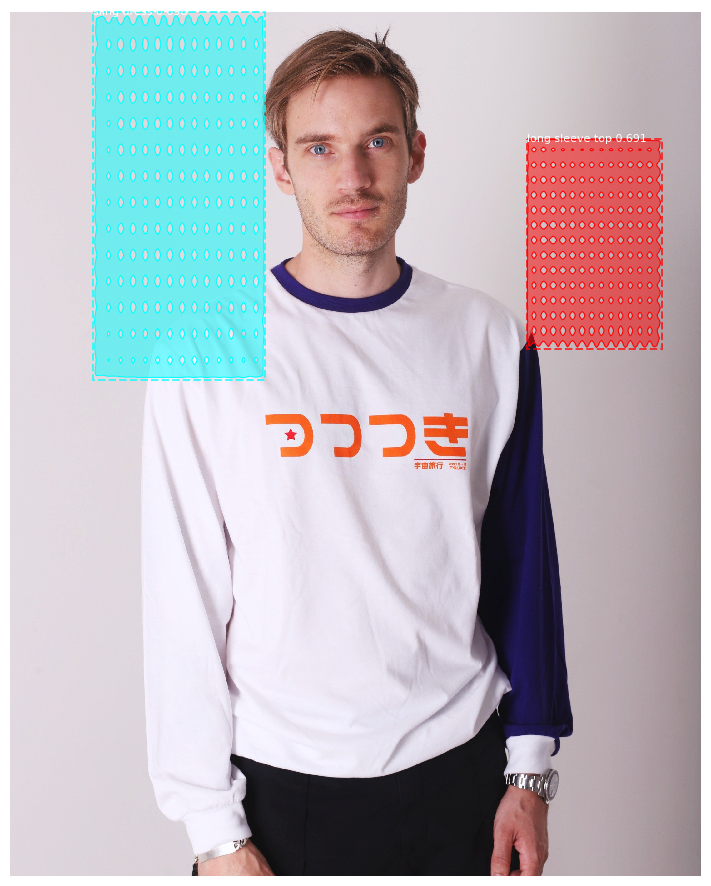

[13  2]


In [22]:
# !wget 'https://cdn.shopify.com/s/files/1/2321/0267/products/felix-longsleeve.jpg'
# !wget 'https://cdn.shopify.com/s/files/1/0210/9734/products/ahzekLR.jpg'
# !wget 'https://mms-images.out.customink.com/mms/images/catalog/colors/4600/views/front.jpg'

test_image='felix-longsleeve.jpg'
# test_image='ahzekLR.jpg'
# test_image='front.jpg'

test_image=plt.imread(test_image)

results = model.detect([test_image], verbose=0)
r = results[0]


class_names= ['BG','short sleeve top',
              'long sleeve top',
              'short sleeve outwear',
              'long sleeve outwear',
              'vest',
              'sling',
              'shorts',
              'trousers',
              'skirt',
              'short sleeve dress',
              'long sleeve dress',
              'vest dress',
              'sling dress']

visualize.display_instances(test_image, 
                                    r['rois'], 
                                    r['masks'], 
                                    r['class_ids'], 
                                    class_names, 
                                    r['scores'])

print(r['class_ids'])





In [0]:
##########
#########
## Mini Mask

##########
#########


from Mask_RCNN.mrcnn import model as modellib, utils

image_id = np.random.choice(train_set.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    train_set, config, image_id, use_mini_mask=False)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)


In [1]:
# trying out the Yolo model
import sys

sys.path.append("/Users/ibrahim/Downloads/fashion_mask_rcnn/")

%cd /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/darknet

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

/Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/darknet


/bin/sh: ./darknet: cannot execute binary file


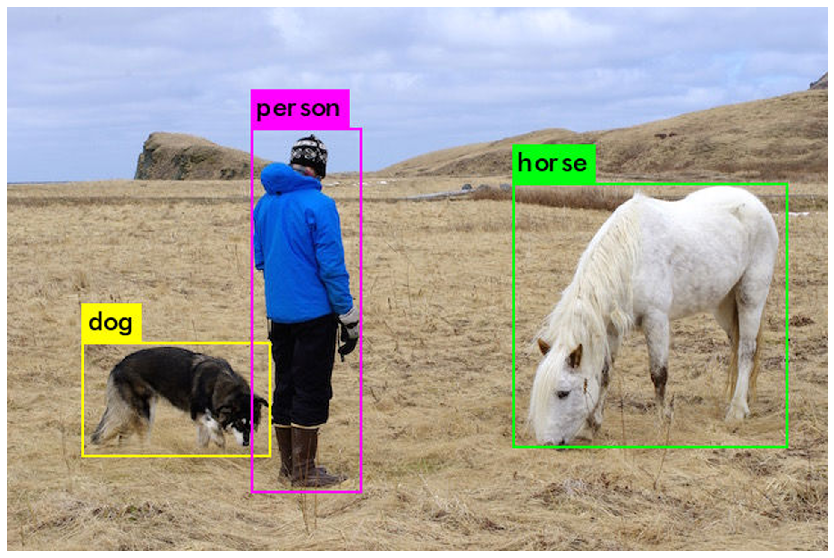

In [6]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg 
# # show image using our helper function
imShow('predictions.jpg')

/bin/sh: /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/darknet: is a directory


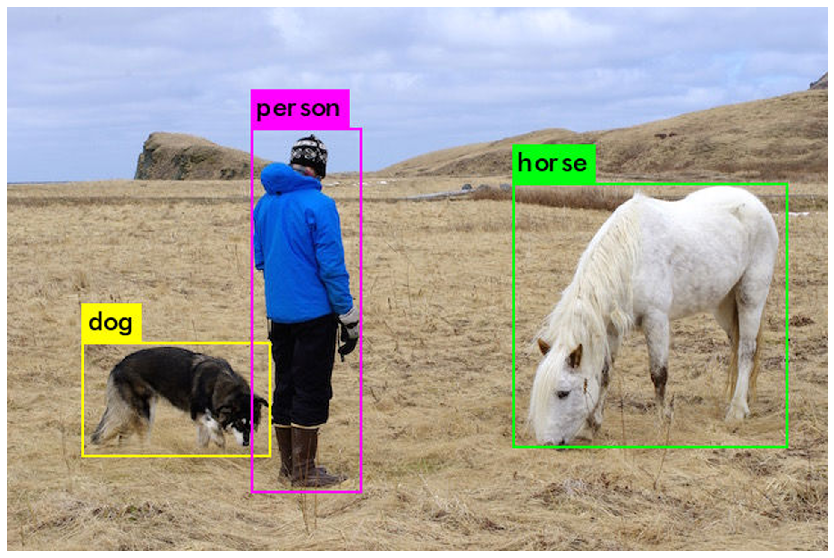

In [5]:
!chmod u+x darknet
!/Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/darknet detector test data/obj.data cfg/yolov3_custom.cfg /mygoogledrive/yolov3/backup/yolov3_custom_last.weights /mygoogledrive/yolov3/test_image/P00402510.jpg -thresh 0.3
imShow('predictions.jpg')